# imports

In [1]:
import xgboost as xg

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns

In [3]:
data=pd.read_table('data-46-raw.txt', error_bad_lines=False)

# Showing Data

In [4]:
data

,core_people_number,important_node_number,live_apple,live_people_number,live_stay_fre,live_weekday_day_time,live_weekday_eve_time,live_weekend_day_time,live_weekend_eve_time,no_core_people_number,...,web_time_enjoy,web_time_life,web_time_other,work_apple,work_people_number,work_stay_fre,work_weekday_day_time,work_weekday_eve_time,work_weekend_day_time,work_weekend_eve_time
163113,9299,NaN,338.0,1725,20353,504539321,219430741,194573597,84256674,2278,...,203532299,307522582,517204479,248.0,934.0,20353,2.159825e+08,20123598.0,35024920.0,5178924.0
197389,2290,NaN,35.0,169,5270,50992004,31109002,22888500,12137993,164,...,59042473,89618870,143134694,13.0,56.0,5270,1.012155e+07,2589411.0,3701744.0,1035127.0
168118,14096,NaN,302.0,1614,27118,500831961,229697218,199836582,87287532,2658,...,341988078,510931920,792443091,459.0,1449.0,27118,5.446620e+08,23814891.0,49501533.0,5885735.0
188098,9227,NaN,102.0,1256,18208,380786429,169545155,152510872,66713387,1738,...,196635129,215223631,492136909,66.0,560.0,18208,9.899350e+07,13162043.0,17763685.0,3781725.0
190908,1693,NaN,6.0,438,3705,120773100,48508307,54545311,20765418,387,...,12501479,17498798,21403683,1.0,77.0,3705,1.127968e+07,1185571.0,3522693.0,512746.0
188789,2125,NaN,49.0,194,5146,57306115,32252568,25465697,12023434,185,...,60979677,141620683,133872366,42.0,131.0,5146,2.667392e+07,3091150.0,4838041.0,969699.0
176684,8749,NaN,209.0,1129,17927,423528442,169624824,167288803,67412583,1503,...,118765752,206185579,309461499,187.0,792.0,17927,2.074080e+08,15254834.0,37218479.0,4641312.0
173810,18740,2.0,590.0,2259,32255,659857982,301160540,257136253,112253519,3908,...,535860244,790800282,1368959603,1945.0,4326.0,32255,1.755345e+09,88006517.0,138321740.0,13329571.0
187374,3435,NaN,131.0,780,5588,279642737,140189190,110003788,56551859,453,...,112851772,114423339,255174229,473.0,1087.0,5588,3.322765e+08,30084540.0,25893568.0,3908784.0
169522,17892,2.0,260.0,1158,38812,374316213,175095831,157848489,66281453,2132,...,577268378,711291635,1420413585,409.0,1087.0,38812,3.585727e+08,19375133.0,56548438.0,4830114.0


In [5]:
store=pd.read_excel('store.xlsx',sheet_name='门店')

In [6]:
store

,conn_ID,AREA_NAME,LONGITUDE,LATITUDE,AREA_TYPE_NAME,出账收入,门店面积(㎡)
0,id_0,西直门,116.363091,39.958078,商业街区,153491.932026,54.60
1,id_1,西三旗,116.373350,40.066404,社区,259348.372549,157.50
2,id_2,北太平庄,116.382692,39.974571,社区,364640.920261,210.00
3,id_3,清河,116.348898,40.036787,社区,301958.980392,105.00
4,id_4,温泉,116.213290,40.045902,社区,271020.145098,189.00
5,id_5,马连洼,116.280258,40.038010,社区,234416.563399,210.00
6,id_6,二里庄,116.377123,40.000263,社区,261308.105882,157.50
7,id_7,中关村,116.324536,39.990528,产业园区,415932.469281,210.00
8,id_8,上地,116.317844,40.033714,社区,453856.010458,252.00
9,id_9,苏州街,116.312849,39.977847,商业街区,181274.793464,157.50


# 计算坪效

In [7]:
store['revenue_per_sqm']=store['出账收入']/store['门店面积(㎡)']

In [8]:
store.columns

Index(['conn_ID', 'AREA_NAME', 'LONGITUDE', 'LATITUDE', 'AREA_TYPE_NAME',
       '出账收入', '门店面积(㎡)', 'revenue_per_sqm'],
      dtype='object')

In [9]:
revenue_per_sqm=store['revenue_per_sqm']

In [10]:
revenue_per_sqm

0      2811.207546
1      1646.656334
2      1736.385335
3      2875.799813
4      1433.969022
5      1116.269350
6      1659.099085
7      1980.630806
8      1801.015915
9      1150.951070
10      579.848983
11     1539.307874
12     1960.763181
13     2619.221942
14      514.449101
15      231.750550
16      831.888667
17      865.554251
18     1387.082602
19     1441.470003
20     2115.897213
21     1038.643461
22      203.823757
23      867.560403
24     1636.144147
25     2704.795409
26     1774.701347
27      633.898646
28      210.871386
29      980.919950
          ...     
168     421.928191
169      43.647553
170     111.661300
171    1502.144648
172     698.443365
173    1924.383007
174    1332.947006
175     937.271491
176    3659.547140
177     570.972263
178     557.749979
179    2723.903181
180    1762.585745
181    2177.607044
182    2614.568859
183    2352.155838
184    3320.908753
185    1805.109244
186    1729.245542
187     713.466147
188    1178.164410
189     532.

# 导入xgboost

In [11]:
from sklearn.model_selection import train_test_split
from xgboost.sklearn import XGBClassifier

X_train, X_test, y_train, y_test = train_test_split(data, revenue_per_sqm, test_size=0.1, random_state=0)

In [12]:
from sklearn import metrics

In [13]:
def xgbtrain(X_train, X_test, y_train, y_test):
    model=xg.XGBRegressor(max_depth=5, learning_rate=0.1, n_estimators=100, silent=True, objective='reg:gamma')
    model.fit(X_train,y_train)
    ans=model.predict(X_test)
    ans1=model.predict(X_train)
    r2_score=metrics.r2_score(y_test,ans)
    r2_score1=metrics.r2_score(y_train,ans1)
    print("The training performance(r2_score) on test set is",r2_score)
    print("The training performance(r2_score) on training set is",r2_score1)

In [14]:
def split(X,y,testsize,seed):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=testsize, random_state=seed)
    return X_train, X_test, y_train, y_test

# 数据处理：标准化

In [15]:
from sklearn.preprocessing import StandardScaler

In [16]:
SS=StandardScaler()
Sdata=SS.fit_transform(data.fillna(0))
revenue=pd.DataFrame(revenue_per_sqm)
Srevenue_psqm=SS.fit_transform(revenue)

In [17]:
Srevenue_psqm=Srevenue_psqm+1

In [18]:
X_train, X_test, y_train, y_test=split(Sdata,revenue_per_sqm,0.1,0)

In [19]:
X_train

array([[ 1.54791321, -0.20534249,  2.54112918, ...,  0.43812757,
         0.60335325,  0.44786535],
       [-0.7026631 , -0.20534249, -0.7425005 , ..., -0.60085154,
        -0.63491304, -0.77860593],
       [ 0.22135068, -0.20534249, -0.38183953, ...,  3.54475311,
         1.46140865,  0.95087815],
       ...,
       [-0.64524961, -0.20534249, -0.6832875 , ..., -0.53101754,
        -0.53550388, -0.55783874],
       [ 0.26878633,  2.80634738, -0.18266855, ...,  0.06127122,
        -0.23093947,  0.2120671 ],
       [-0.69268526, -0.20534249, -0.7478835 , ..., -0.59733141,
        -0.58290111, -0.65722588]])

# 数据简单标准化后跑了一遍，效果很差

In [20]:
xgbtrain(X_train, X_test, y_train, y_test)

The training performance(r2_score) on test set is -0.15051228222724733
The training performance(r2_score) on training set is 0.5452474787967462


# 试了一下pca，看了一下最主要的元素，感觉基本没救了

In [21]:
from sklearn.decomposition import PCA
pca=PCA(n_components=0.7)
Pdata=pca.fit_transform(Sdata)
print (pca.explained_variance_ratio_)
print (pca.explained_variance_)
print (pca.n_components_)

[0.71010999]
[32.83087185]
1


In [22]:
Pdata

array([[ 6.47029954],
       [-2.43559705],
       [ 9.3695771 ],
       [ 3.52467406],
       [-2.93203528],
       [-2.38651289],
       [ 3.57560569],
       [17.55776167],
       [ 0.50277747],
       [12.44168041],
       [ 4.5601595 ],
       [ 2.04223945],
       [ 6.05777727],
       [15.60770835],
       [ 4.31043588],
       [-0.70537529],
       [ 6.70153352],
       [ 1.30715559],
       [ 0.57819827],
       [ 1.24477461],
       [ 1.45664451],
       [-3.07957693],
       [-2.39872337],
       [-1.93090132],
       [-0.25358223],
       [-3.03284467],
       [ 0.41899848],
       [42.20815971],
       [ 1.61668506],
       [ 3.67142525],
       [21.04138148],
       [-1.86664215],
       [-4.20166449],
       [-0.11294972],
       [ 4.97876272],
       [-3.46218433],
       [ 4.79659799],
       [-1.06189639],
       [-0.53286551],
       [-4.01488558],
       [ 3.36030251],
       [-4.12416756],
       [-4.24345295],
       [-4.33198395],
       [ 4.03908983],
       [ 1

In [23]:
X_train, X_test, y_train, y_test=split(Pdata,revenue_per_sqm,0.1,5)
xgbtrain(X_train, X_test, y_train, y_test)

The training performance(r2_score) on test set is 0.22482803917708005
The training performance(r2_score) on training set is 0.3636996831728966


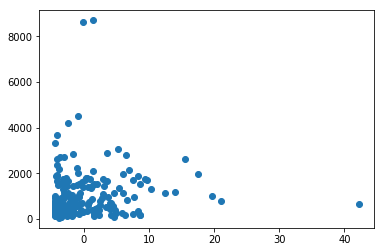

In [24]:
import matplotlib.pyplot as plt
plt.scatter(Pdata,revenue_per_sqm)

In [26]:
r=pd.DataFrame(revenue_per_sqm)
p=pd.DataFrame(Pdata)
frames=[p,r]
datanew=pd.concat(frames,axis=1,ignore_index=True)

In [27]:
datanew

,0,1
0,6.470300,2811.207546
1,-2.435597,1646.656334
2,9.369577,1736.385335
3,3.524674,2875.799813
4,-2.932035,1433.969022
5,-2.386513,1116.269350
6,3.575606,1659.099085
7,17.557762,1980.630806
8,0.502777,1801.015915
9,12.441680,1150.951070


In [28]:
datanew.columns=['x','y']
datanew=datanew[datanew['x']<30]

In [29]:

datanew=datanew[datanew['y']<8000]

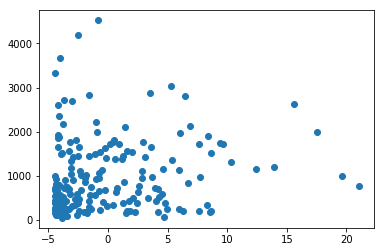

In [30]:
plt.scatter(datanew.x,datanew.y)